# Bank_customer_churn_classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,roc_curve,precision_score,precision_recall_curve,recall_score
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=UserWarning)

In [3]:
data=pd.read_csv(r"C:\Users\bannu\Desktop\churn_prediction.csv")

In [4]:
data.head(5)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [5]:
data.shape

(28382, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [7]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000




# Missing Values

In [37]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [38]:
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [39]:
#convert gender
dict_gender={'Male':1,'Female':0}
data.replace({'gender':dict_gender},inplace=True)
data['gender']=data['gender'].fillna(-1)

In [40]:
data['gender']

0        1.0
1        1.0
2        1.0
3       -1.0
4        1.0
        ... 
28377    0.0
28378    0.0
28379    1.0
28380    1.0
28381    1.0
Name: gender, Length: 28382, dtype: float64

In [41]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [42]:
data['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

In [43]:
data['dependents']=data['dependents'].fillna(0)
data['occupation']=data['occupation'].fillna('self_employed')
data['dependents']

0        0.0
1        0.0
2        0.0
3        0.0
4        2.0
        ... 
28377    0.0
28378    0.0
28379    0.0
28380    3.0
28381    0.0
Name: dependents, Length: 28382, dtype: float64

In [44]:
data['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
748.0        1
1099.0       1
108.0        1
655.0        1
723.0        1
Name: city, Length: 1604, dtype: int64

In [45]:
#most occuring value is 1020 thats why its filled with 1020
data['city']=data['city'].fillna(1020)

In [46]:
data['days_since_last_transaction'].value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
309.0       1
225.0       1
183.0       1
92.0        1
334.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

In [47]:
#here is also same thing its taking most occuring value 
data['days_since_last_transaction']=data['days_since_last_transaction'].fillna(999)

In [48]:
data['days_since_last_transaction']

0        224.0
1         60.0
2        999.0
3        147.0
4         58.0
         ...  
28377     70.0
28378     14.0
28379      0.0
28380    999.0
28381     59.0
Name: days_since_last_transaction, Length: 28382, dtype: float64

# Data preprocessing

In [49]:
data=pd.concat([data,pd.get_dummies(data['occupation'],prefix=str('occupation'),prefix_sep='_')],axis=1)

In [50]:
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,0.0,0.0,student,1020.0,2,1207,70.0,...,0.30,0.30,1076.43,1076.43,0,0,0,0,0,1
28378,30298,4919,34,0.0,0.0,self_employed,1046.0,2,223,14.0,...,901.00,1014.07,3738.54,3690.32,0,0,0,0,1,0
28379,30299,297,47,1.0,0.0,salaried,1096.0,2,588,0.0,...,168.23,71.80,61078.50,57564.24,1,0,0,1,0,0
28380,30300,2585,50,1.0,3.0,self_employed,1219.0,3,274,999.0,...,0.20,0.20,1625.55,1625.55,0,0,0,0,1,0


# Scaling Numerical Features for Logistic Regression

In [51]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student'],
      dtype='object')

In [52]:
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit',
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_cols:
    data[i] = np.log(data[i] + 17000)

std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [53]:
data_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [60]:
y_all = data.churn
data = data.drop(['churn','customer_id','occupation'],axis = 1)

# Model Building and Evaluation Metrics

In [61]:
baseline_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [62]:
data_baseline = data[baseline_cols]

# Train Test Split to create a validation set

In [63]:
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(data_baseline,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [64]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]

# AUC ROC Curve & Confusion Matrix

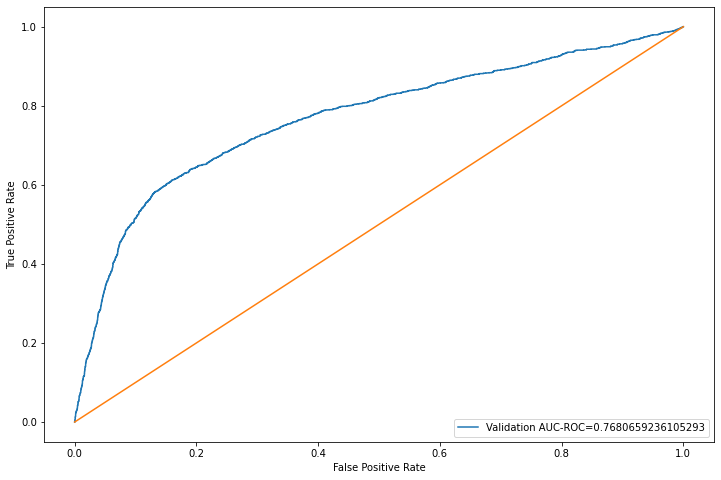

In [65]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred)
auc = roc_auc_score(ytest, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [66]:
# Confusion Matrix
pred_val = model.predict(xtest)

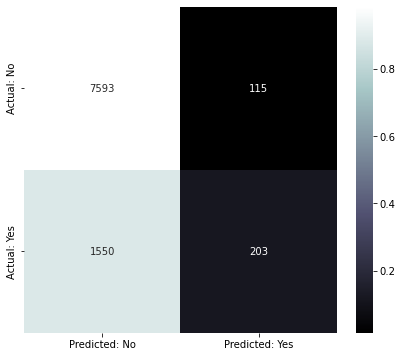

In [67]:
label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [68]:
# Recall Score
recall_score(ytest,pred_val)

0.11580148317170565

# Cross validation

In [69]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = data.columns):
    i = 1
    cv_scores = []
    data1 = data.copy()
    data1 = data[cols]

    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for data_index,test_index in kf.split(data1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = data1.loc[data_index],data1.loc[test_index]
        ytr,yvl = y_all.loc[data_index],y_all.loc[test_index]

        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []

        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)

        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))

         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [70]:
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols)


1 of kfold 5
ROC AUC Score: 0.7644836090843695, Recall Score: 0.0751, Precision Score: 0.5766 

2 of kfold 5
ROC AUC Score: 0.779451238310554, Recall Score: 0.0751, Precision Score: 0.6695 

3 of kfold 5
ROC AUC Score: 0.7551621478942728, Recall Score: 0.1350, Precision Score: 0.6425 

4 of kfold 5
ROC AUC Score: 0.7582070977015274, Recall Score: 0.1169, Precision Score: 0.6508 

5 of kfold 5
ROC AUC Score: 0.7632311004249608, Recall Score: 0.1112, Precision Score: 0.5850 


In [71]:
all_feat_scores = cv_score(LogisticRegression())


1 of kfold 5
ROC AUC Score: 0.7322735587298325, Recall Score: 0.1093, Precision Score: 0.5066 

2 of kfold 5
ROC AUC Score: 0.7681477751515774, Recall Score: 0.1968, Precision Score: 0.6809 

3 of kfold 5
ROC AUC Score: 0.7392333107476944, Recall Score: 0.1673, Precision Score: 0.5714 

4 of kfold 5
ROC AUC Score: 0.7394851378820373, Recall Score: 0.1597, Precision Score: 0.6667 

5 of kfold 5
ROC AUC Score: 0.758833273580065, Recall Score: 0.1730, Precision Score: 0.5987 


# Reverse feature Elemination

In [73]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(data, y_all)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [76]:
ranking_data = pd.DataFrame()
ranking_data['Feature_name'] = data.columns
ranking_data['Rank'] = rfe.ranking_

In [77]:
ranked = ranking_data.sort_values(by=['Rank'])

In [78]:
ranked

,Feature_name,Rank
13,current_balance,1
16,average_monthly_balance_prevQ,2
7,occupation_company,3
15,average_monthly_balance_prevQ2,4
21,current_month_balance,5
22,previous_month_balance,6
19,current_month_debit,7
10,occupation_self_employed,8
9,occupation_salaried,9
11,occupation_student,10


In [79]:
rfe_top_10_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values)


1 of kfold 5
ROC AUC Score: 0.7986881101633954, Recall Score: 0.2281, Precision Score: 0.7362 

2 of kfold 5
ROC AUC Score: 0.8050442914397288, Recall Score: 0.2234, Precision Score: 0.7556 

3 of kfold 5
ROC AUC Score: 0.7985130070256687, Recall Score: 0.2205, Precision Score: 0.7250 

4 of kfold 5
ROC AUC Score: 0.7935095616193245, Recall Score: 0.2120, Precision Score: 0.7360 

5 of kfold 5
ROC AUC Score: 0.7942222838028076, Recall Score: 0.1911, Precision Score: 0.6745 


In [80]:
cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values, thres=0.14)


1 of kfold 5
ROC AUC Score: 0.7986881101633954, Recall Score: 0.8308, Precision Score: 0.2836 

2 of kfold 5
ROC AUC Score: 0.8050442914397288, Recall Score: 0.8375, Precision Score: 0.2902 

3 of kfold 5
ROC AUC Score: 0.7985130070256687, Recall Score: 0.8279, Precision Score: 0.2897 

4 of kfold 5
ROC AUC Score: 0.7935095616193245, Recall Score: 0.8213, Precision Score: 0.2840 

5 of kfold 5
ROC AUC Score: 0.7942222838028076, Recall Score: 0.8108, Precision Score: 0.2927 


[0.7986881101633954,
 0.8050442914397288,
 0.7985130070256687,
 0.7935095616193245,
 0.7942222838028076]

# Comparison of Different model fold wise

In [81]:
results_data = pd.DataFrame({'baseline':baseline_scores, 'all_feats': all_feat_scores, 'rfe_top_10': rfe_top_10_scores})

<AxesSubplot:>

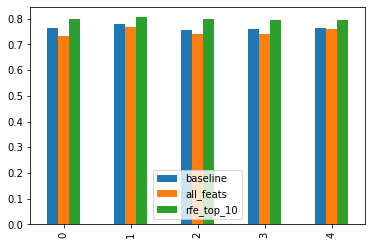

In [82]:
results_data.plot(y=["baseline", "all_feats", "rfe_top_10"], kind="bar")